In [8]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.datasets.mnist import load_data
from keras.datasets import mnist
from numpy.random import seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import History

In [2]:
seed(123)

# Zad 
Pibierz zbiór danych

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0].shape)

nb_classes = len(np.unique(y_train))
n_samples = X_train.shape[0]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
(28, 28, 1)


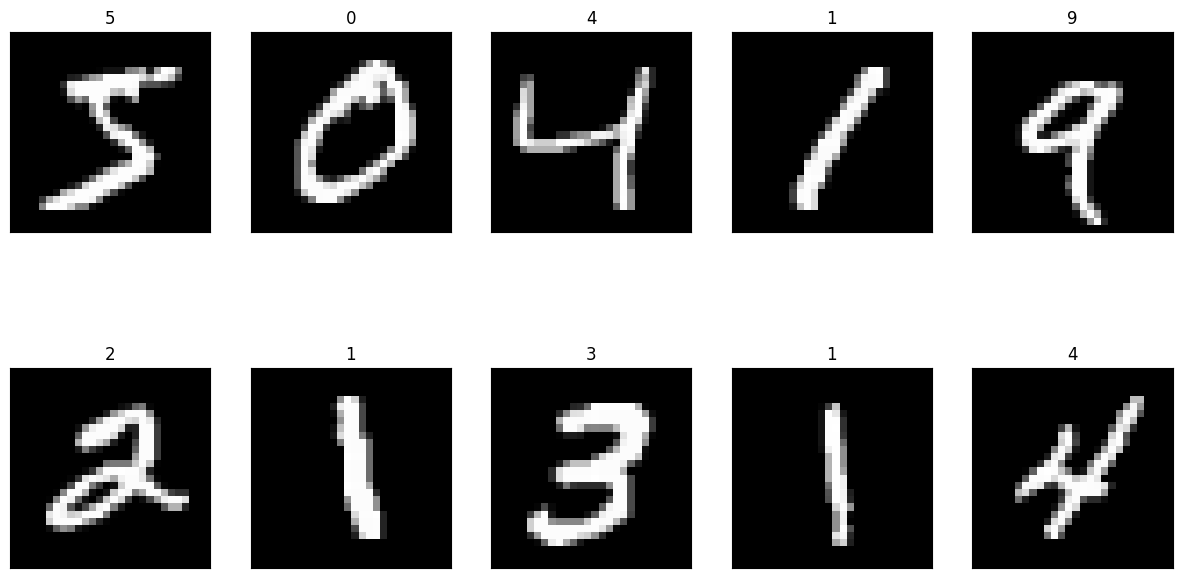

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y_train, X_train, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

In [5]:
np.max(X_train[0])

255

### Normalize

In [6]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train/255
X_test = X_test/255

# one hot encode outputs
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

num_classes = y_test.shape[1]

X_train[0].shape

(28, 28, 1)

In [11]:
np.max(X_train[0])

0.00392156862745098

# normalize inputs from 0-255 to 0.0-1.0# Zad
Przekopiuj architekturę:

https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [9]:
history_1 = History()

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2, callbacks=[history_1])

/home/krystianjachna/Desktop/AI/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-09 22:23:49.945496: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/10
300/300 - 14s - 46ms/step - accuracy: 0.9183 - loss: 0.2711 - val_accuracy: 0.9819 - val_loss: 0.0553
Epoch 2/10
300/300 - 13s - 44ms/step - accuracy: 0.9740 - loss: 0.0875 - val_accuracy: 0.9883 - val_loss: 0.0363
Epoch 3/10
300/300 - 13s - 44ms/step - accuracy: 0.9801 - loss: 0.0672 - val_accuracy: 0.9901 - val_loss: 0.0301
Epoch 4/10
300/300 - 13s - 43ms/step - accuracy: 0.9837 - loss: 0.0533 - val_accuracy: 0.9890 - val_loss: 0.0319
Epoch 5/10
300/300 - 14s - 45ms/step - accuracy: 0.9861 - loss: 0.0449 - val_accuracy: 0.9897 - val_loss: 0.0287
Epoch 6/10
300/300 - 13s - 44ms/step - accuracy: 0.9880 - loss: 0.0395 - val_accuracy: 0.9910 - val_loss: 0.0275
Epoch 7/10
300/300 - 13s - 44ms/step - accuracy: 0.9893 - loss: 0.0345 - val_accuracy: 0.9898 - val_loss: 0.0300
Epoch 8/10
300/300 - 13s - 43ms/step - accuracy: 0.9890 - loss: 0.0325 - val_accuracy: 0.9914 - val_loss: 0.0261
Epoch 9/10
300/300 - 13s - 43ms/step - accuracy: 0.9907 - loss: 0.0286 - val_accuracy: 0.9921 - 

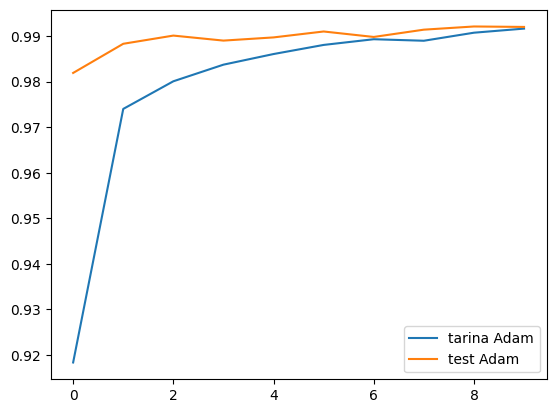

In [11]:
plt.plot(history_1.history['accuracy'], label = "tarina Adam")
plt.plot(history_1.history['val_accuracy'], label = "test Adam")

plt.legend()
plt.show()